<a href="https://colab.research.google.com/github/FOACapstone/Future-Orientation-Analysis-Tool/blob/main/Future_Orientation_Analysis_(FOA)_Tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#THE FUTURE ORIENTATION ANALYSIS (FOA) TOOL

## 1. Preparation and cluster allocation

In [39]:
#@title 1.1 Run this code to get the FOA tool ready


"""Import libraries"""

import pandas as pd
import nltk.data
from nltk import word_tokenize, pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import word_tokenize, pos_tag

import numpy as np
my_colors = ['b', 'orange', 'r', 'g', 'y' ]
my_colors_rev = ['g','r', 'b', 'orange', 'y' ]



"""load functions"""

def pillarfun(text):
    pc_dict = {}
    for key, value in clusters.items():
      counter= 0
      for i in value:
        if i in text:
          counter += 1
      pc_dict[key] = counter
    dominant_pillar_maxval = max(pc_dict.values())
    dominant_pillar = [key for key, value in pc_dict.items() if value > 0 and value  == dominant_pillar_maxval]
    return dominant_pillar


def orientation_keywords(text):
    oc_dict = {}
    for key, value in orientations.items():
      counter = 0
      for i in value:
        if i in text:
          counter += 1
      oc_dict[key] = counter
    dominant_orientation_maxval = max(oc_dict.values())
    dominant_orientation = [key for key, value in oc_dict.items() if value > 0 and value == dominant_orientation_maxval]
    return dominant_orientation


def orientation_expressioncount(text):
  counter = 0
  expressionlist=[]
  expressionlist=fexpressions_keywords
  for i in expressionlist:
    if i in text:
      counter += 1
  return counter

def tosentence(text):
  sent_text = nltk.sent_tokenize(text)
  return (sent_text,text)

def speechclusters(df):
  df_pillar=pd.DataFrame()
  df_pillar['Dominant Pillar'] = df['Text'].apply(pillarfun)
  df_pillar=pd.concat([df, df_pillar], axis=1)
  cleared_df=df_pillar.explode('Dominant Pillar').rename(columns={"index":'Speech_ID'})
  return cleared_df

def speechclusters_include_empty(df):
  df_pillar=pd.DataFrame()
  df_pillar['Dominant Pillar'] = df['Text'].apply(pillarfun)
  df_pillar=pd.concat([df, df_pillar], axis=1)
  cleared_df=df_pillar
  cleared_df=cleared_df.explode('Dominant Pillar').rename(columns={"index":'Speech_ID'})
  return cleared_df

def sentenceclusters(df):
  dfx = df['Text'].apply(tosentence).apply(pd.Series)
  dfx.columns = ['Sentences','Origin']
  dfx=pd.concat([df, dfx], axis=1)
  dfy=dfx.explode('Sentences')
  dfz=pd.DataFrame()
  dfz['Dominant Pillar'] = dfy['Sentences'].apply(pillarfun)
  sentence_pillar_df=pd.concat([dfy, dfz], axis=1)
  cleared_df = sentence_pillar_df[sentence_pillar_df['Dominant Pillar'].map(lambda d: len(d)) > 0]
  cleared_df=cleared_df.reset_index(drop=False)
  cleared_df=cleared_df.explode('Dominant Pillar').rename(columns={"index":'Speech_ID'})
  return cleared_df


def sentenceclusters_include_empty(df):
  dfx = df['Text'].apply(tosentence).apply(pd.Series)
  dfx.columns = ['Sentences','Origin']
  dfx=pd.concat([df, dfx], axis=1)
  dfy=dfx.explode('Sentences')
  dfz=pd.DataFrame()
  dfz['Dominant Pillar'] = dfy['Sentences'].apply(pillarfun)
  sentence_pillar_df=pd.concat([dfy, dfz], axis=1)
  cleared_df=sentence_pillar_df.reset_index(drop=False)
  cleared_df=cleared_df.explode('Dominant Pillar').rename(columns={"index":'Speech_ID'})
  return cleared_df

def sentenceclustersfo(df):
  df_sent=sentenceclusters(df)
  df_orient=pd.DataFrame()
  df_orient['Dominant Orientation']=df_sent['Sentences'].apply(orientation_keywords)
  df_sent_timekey=pd.concat([df_sent,df_orient],axis=1)
  cleared_df=df_sent_timekey.explode('Dominant Orientation').rename(columns={"index":'Speech_ID'})
  return cleared_df

def speechclustersfo(df):
  df_pillar=speechclusters(df)
  df_orient=pd.DataFrame()
  df_orient['Dominant Orientation']=df_pillar['Text'].apply(orientation_keywords)
  df_speech_timekey=pd.concat([df_pillar,df_orient],axis=1)
  cleared_df=df_speech_timekey.explode('Dominant Orientation').rename(columns={"index":'Speech_ID'})
  return cleared_df

def determine_tense_input(sentence):
  text = word_tokenize(sentence)
  tagged = pos_tag(text)
  future = len([word for word in tagged if word[1] == "MD"])
  present = len([word for word in tagged if word[1] in ["VBP", "VBZ","VBG"]])
  past = len([word for word in tagged if word[1] in ["VBD", "VBN"]])
  return(future,present,past)

def sentence_verbtense(df):
  df3=pd.DataFrame()
  cleared_df=sentenceclusters(df)
  df3=cleared_df['Sentences'].apply(determine_tense_input).apply(pd.Series)
  df3.columns = ['future', 'present', 'past']
  cleared_df=pd.concat([cleared_df, df3], axis=1)

  return cleared_df

def speech_verbtense(df):
  df3=pd.DataFrame()
  cleared_df=speechclusters(df)
  df3=cleared_df['Text'].apply(determine_tense_input).apply(pd.Series)
  df3.columns = ['future', 'present', 'past']
  cleared_df=pd.concat([cleared_df, df3], axis=1)
  return cleared_df


def export_to_excel(data,path):
  data.to_excel(path, index=True)

def plotclusters(df_plot):
  df_plot=df_plot.count()
  df_plota=df_plot.filter(['Year', 'Dominant Pillar','Text'])
  df_plota=df_plota.reset_index(drop=False)
  df_plota=df_plota.pivot(index='Year',columns='Dominant Pillar',values='Text')

  df_plotb=df_plot.reset_index(drop=False)
  df_plotb['year_total'] = df_plotb.groupby('Year')['Text'].transform('sum')
  df_plotb=df_plotb.filter(['Year', 'Dominant Pillar','Text','year_total'])
  df_plotb['percentage'] = df_plotb.Text / df_plotb.year_total * 100
  df_plotb=df_plotb.pivot(index='Year',columns='Dominant Pillar',values='percentage')
  return [df_plota,df_plotb]

def plotclustersfo(df_plot):
  df_plota=df_plot.count()
  df_plota=df_plota.filter(['Year', 'Dominant Pillar','Dominant Orientation','Text'])
  df_plota=df_plota.reset_index(drop=False)
  df_plota=df_plota.pivot(index='Year',columns=['Dominant Pillar','Dominant Orientation'],values='Text')

  df_plotb=[]
  for key, value in clusters.items():
    df_plotx=df_plot.count()
    df_plotx=df_plotx.reset_index(drop=False)
    df_plotx=df_plotx.where(df_plotx['Dominant Pillar'] == key).dropna(thresh=2)
    df_plotx['year_total'] = df_plotx.groupby('Year')['Text'].transform('sum')
    df_plotx['percentage'] = df_plotx.Text / df_plotx.year_total * 100
    df_plotx=df_plotx.pivot(index='Year',columns=['Dominant Pillar','Dominant Orientation'],values='percentage')
    df_plotb.append(df_plotx)
  return [df_plota,df_plotb]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [45]:
#@title 1.2 Upload your raw data
# @markdown Enter the path to your excel Datafile here:
My_Excel="https://github.com/FOACapstone/Future-Orientation-Analysis-Tool/blob/main/data/Database%20SG%20speeches%20and%20remarks%20(2016-2023).xlsx?raw=true" #@param {type:"string"}
# @markdown It must contain one column with the date of publication ("date") and one with the content of the documents ("text").
df = pd.read_excel(My_Excel)
df['Date']=pd.to_datetime(df['Date'], errors='coerce')
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['content'] = df['Text'].str.lower()

In [41]:
#@title 1.3 Identify clusters in your dataset
# @markdown We are using the k-means clustering algorithm from the scikit-learn library to identify theme clusters.
# @markdown How many clusters should be generated?
n_clusters = 10 # @param {type:"integer"}
# @markdown Clusters include ngrams (terms containing more than one word) - How many words would you like to include in your ngrams?
max_ngram_length=2# @param {type:"integer"}
# @markdown How many characterising terms should be printed per cluster?
num_terms=5# @param {type:"integer"}

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
'''Label column with text content'''
texts = df['Text']

'''Preprocessing: TF-IDF Vectorization'''
vectorizer = TfidfVectorizer(stop_words='english', ngram_range = (1,max_ngram_length))
X = vectorizer.fit_transform(texts)

'''Apply K-Means Clustering'''
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X)

'''Assigning the clusters and inserting them into the original DataFrame'''
df['Cluster'] = kmeans.labels_

'''Output the result'''
print(df[['Text', 'Cluster']])

'''Function for list of top terms in each cluster'''
def print_top_terms_per_cluster(kmeans_model, vectorizer,n_clusters, num_terms):
    order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()

'''Create a dictionary for top terms'''
    for i in range(n_clusters):
        print(f"Cluster {i}:")
        top_terms = [terms[ind] for ind in order_centroids[i, :num_terms]]
        print(", ".join(top_terms))

''' Print top terms for each cluster for x terms'''
print_top_terms_per_cluster(kmeans, vectorizer,n_clusters, num_terms)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                                   Text  Cluster
0     dear colleagues, this is indeed a very emotion...        3
1     madame president, may i first of all thank you...        2
2     ladies and gentleman, thank you very much for ...        4
3     ladies and gentlemen of the media, thank you v...        4
4     [as delivered]señor presidente de la republica...        2
...                                                 ...      ...
1202  ladies and gentlemen of the press – good after...        3
1203  excellencies, dear friends,thank you very much...        9
1204  i congratulate japan on its presidency at the ...        4
1205  your excellency, prime minister sharif,excelle...        8
1206  ladies and gentlemen of the media,i am indeed ...        8

[1207 rows x 2 columns]
Cluster 0:
rights, human, human rights, world, racism
Cluster 1:
countries, global, developing, debt, development
Cluster 2:
et, la, les, des, le
Cluster 3:
world, climate, development, people, c

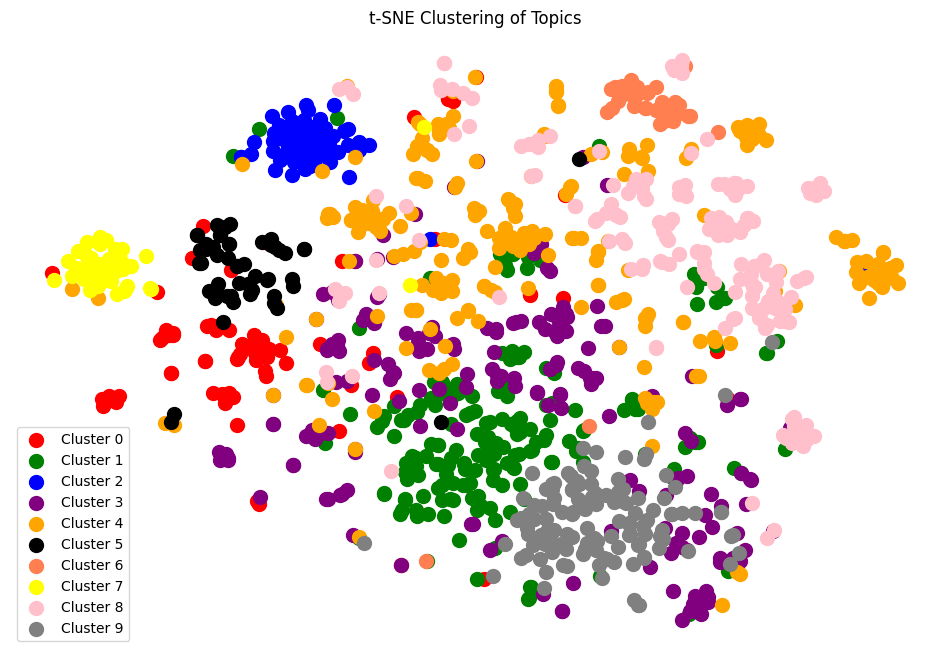

In [42]:
#@title 1.4 Visualize the clusters in a scatter plot
# @markdown Kindly note that if you've chosen over 25 clusters in the preceding step, additional colors must be incorporated into the code to ensure accurate cluster visualization.
# Function to get top terms for each cluster
def get_top_terms_per_cluster(centroids, feature_names, num_terms=10):
    top_terms = {}
    for i in range(n_clusters):
        top_terms[i] = [feature_names[ind] for ind in centroids[i].argsort()[-num_terms:]]
    return top_terms

# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

# Get feature names from the TF-IDF Vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get top terms for each cluster
cluster_top_terms = get_top_terms_per_cluster(centroids, feature_names)

# t-SNE transformation
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(np.asarray(X.todense()))

# Plotting
plt.figure(figsize=(12, 8))
colors = ['red', 'green', 'blue', 'purple', 'orange','black','coral','yellow','pink','grey', 'cyan', 'royalblue', 'lime', 'indigo', 'plum', 'azure', 'beige', 'lightyellow', 'gold',
'olive', 'wheat', 'tan', 'seashell', 'honeydew', 'peru', 'tomato']  # Adjust colors for your number of clusters

for i in range(n_clusters):
    points = X_tsne[kmeans.labels_ == i]
    plt.scatter(points[:, 0], points[:, 1], s=100, c=colors[i], label=f'Cluster {i}')


plt.title('t-SNE Clustering of Topics')
plt.legend()

# Hide the axes
plt.xticks([])
plt.yticks([])
plt.box(False)

plt.show()

In [46]:
#@title 1.5 Characterise your clusters via keywords
# @markdown Enter a title (cluster_label) and a list of keywords (cluster_ngrams) characterising each cluster:

cluster_1_label="Sustainable Development"#@param {type:"string"}
cluster_1_ngrams = ["climate", "carbon", "emissions", "emission", "energy", "fossil", "net zero", "sustainable",  "development", "sustainability", "developing", "growth", "environment", "environmental"] #@param {type:"raw"}
cluster_2_label="Peace and Security"#@param {type:"string"}
cluster_2_ngrams = ["blockade", "security", "conflict", "civilians", "peacekeepers", "peacekeeping", "ukraine", "russian", "russians", "ukrainian", "ukrainians", "war", "gaza", "palestinian", "israel", "palestinians", "palestine", "afghanistan", "afghan", "afghans", "taliban", "terrorism", "terrorist", "nuclear", "proliferation", "non-proliferation", "peace", "ceasefire", "reconciliation", "disarmament", "mediation","peacemaking", "peaceful", "non-aggression", "military", "cybersecurity", "sudan", "mali", "lebanon", "congo", "violence", "torture"]#@param {type:"raw"}
cluster_3_label="Human Rights"#@param {type:"string"}
cluster_3_ngrams = ["forced labor", "forced labour", "human rights", "rights", "holocaust", "genocide", "jews", "torture", "hate speech", "xenophobia", "semitism", "anti-semitism", "gender", "equality", "disabilities", "disability", "inclusion", "health", "healthcare", "education", "famine", "starvation", "poverty", "malnutrition", "exploitation", "shelter", "discrimination", "covid", "pandemic", "basic needs", "privacy", "justice", "liberty", "freedom", "religion", "women", "child protection"]#@param {type:"raw"}
cluster_4_label="Humanitarian Aid"#@param {type:"string"}
cluster_4_ngrams = ["migration", "migrants", "trafficking", "traffickers", "refugees", "unrwa", "refugee", "humanitarian", "asylum", "resource transfer", "camps", "multilateral aid", "displacement", "disaster relief", "resettlement", "hurricanes", "storms", "hurricane","flooding", "storms", "floodings", "natural disaster", "forced displacement", "exile"]#@param {type:"raw"}
#cluster_5_label = "Governance and Rule of Law"#@param {type:"string"}
#cluster_5_ngrams = ["ai, technology, regulation, misinformation, disinformation, governance"]#@param {type:"raw"}

clusters = {
    cluster_1_label: cluster_1_ngrams,
    cluster_2_label: cluster_2_ngrams,
    cluster_3_label: cluster_3_ngrams,
    cluster_4_label: cluster_4_ngrams,
    }



Please be advised that should you intend to analyze a different number of clusters, adjustments to the code will be necessary. For detailed instructions on how to do this, kindly refer to the tool manual of the Capstone Project report (21.03.24).

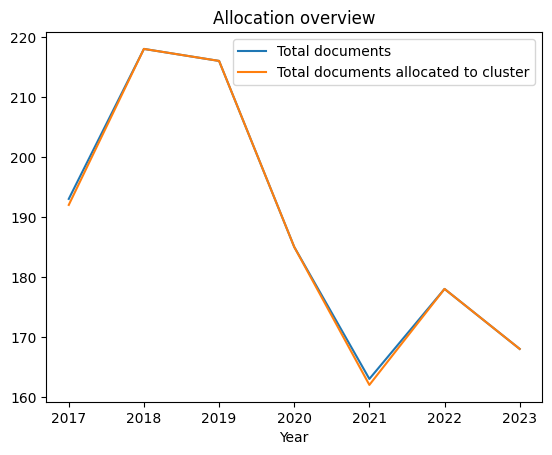

In [47]:
#@title 1.6 Verify and visualize your cluster allocation
# @markdown Select the approach for the unit of analysis allocation:
Algorithm = "Document allocation" # @param ["Document allocation", "Token allocation"]
# @markdown Choose the style of visualization:
Style='line'# @param ['line','bar','barh','hist','box','pie']
Export_Excel = False # @param {type:"boolean"}
Exportpath = "/content/drive/MyDrive/DocAllocation.xlsx" # @param {type:"string"}
# @markdown Please enter full path including file name when exporting to Excel.



if Algorithm=="Document allocation":
  df_plot=speechclusters_include_empty(df)
  df_excel=df_plot
  df_plot=df_plot.groupby(['Year']).count()
  df_plot=df_plot.filter(['Year','Text','Dominant Pillar'])
  df_plot=df_plot.rename(columns={"Text": "Total documents", "Dominant Pillar": "Total documents allocated to cluster"})
  df_plot.plot(kind=Style, title="Allocation overview")

if Algorithm=="Token allocation":
  df_plot=sentenceclusters_include_empty(df)
  df_excel=df_plot
  df_plot=df_plot.groupby(['Year']).count()
  df_plot=df_plot.filter(['Year','Text','Dominant Pillar'])
  df_plot=df_plot.rename(columns={"Text": "Total sentences", "Dominant Pillar": "Total sentences allocated to cluster"})
  df_plot.plot(kind=Style, title="Allocation overview")

if Export_Excel == True:
  export_to_excel(df_excel,Exportpath)

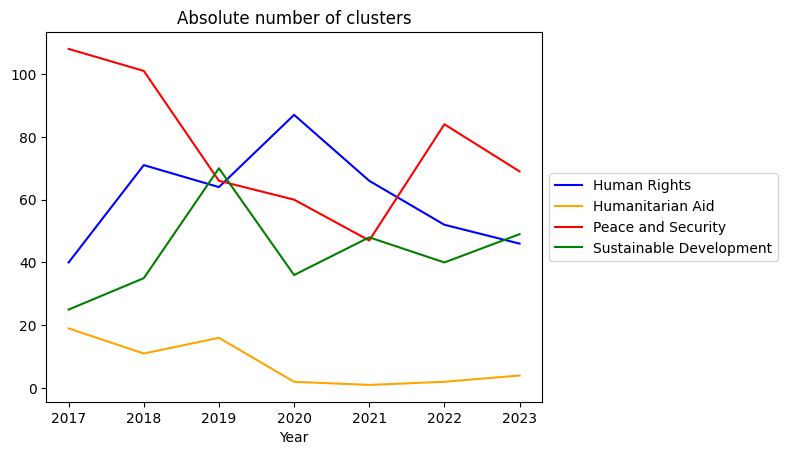

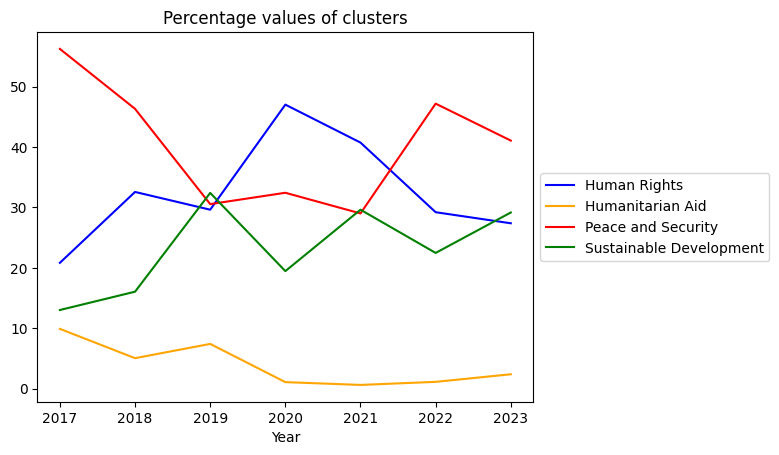

In [ ]:
#@title 1.7 Visualize the dominant cluster allocation
# @markdown Select the approach for the unit of analysis allocation:
Algorithm = "Document clusters" # @param ["Document clusters", "Token clusters"]
# @markdown Choose the style of visualization:
Style='line'# @param ['line','bar','barh','hist','box','pie']
Export_Excel = False # @param {type:"boolean"}
Exportpath = "/content/drive/MyDrive/speech clusters.xlsx" # @param {type:"string"}
# @markdown Please enter full path including file name when exporting to Excel.

if Algorithm =='Document clusters':
  df_plot=speechclusters(df).groupby(['Year', 'Dominant Pillar'])
  df_plota=plotclusters(df_plot)[0]
  df_plota.plot(kind=Style, title="Absolute number of clusters",color=my_colors)
  plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
  df_plotb=plotclusters(df_plot)[1]
  df_plotb.plot(kind=Style, title="Percentage values of clusters",color=my_colors)
  plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

if Algorithm =='Token clusters':
  df_plot=sentenceclusters(df).groupby(['Year', 'Dominant Pillar'])

  df_plota=plotclusters(df_plot)[0]
  df_plota.plot(kind=Style, title="Absolute number of clusters",color=my_colors)
  plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
  df_plotb=plotclusters(df_plot)[1]
  df_plotb.plot(kind=Style, title="Percentage values of clusters",color=my_colors)
  plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


df_excel=pd.concat([df_plota,df_plotb],axis=1)
if Export_Excel == True:
  export_to_excel(df_excel,Exportpath)

## 2. The word "future" in the corpus

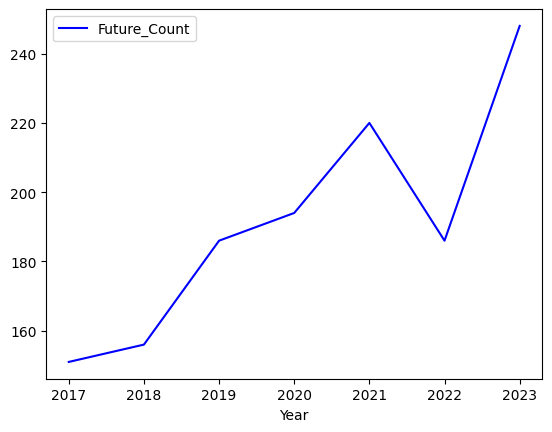

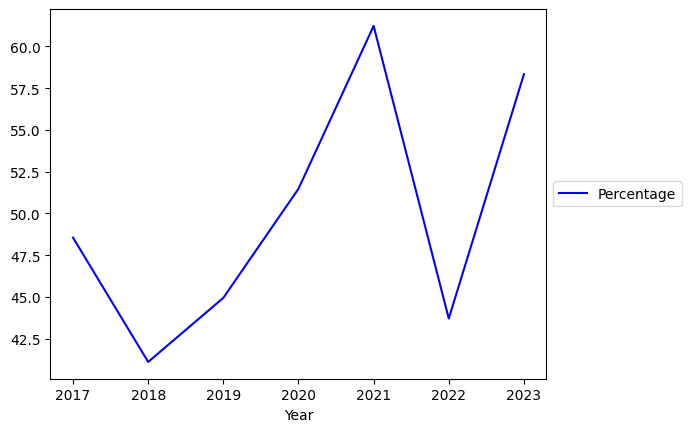

In [ ]:
#@title 2.1 Visualize the behavior of the word "future" in the corpus and per unit of analysis
# @markdown Select the approach for the unit of analysis allocation:
Algorithm = "Corpus future counter" # @param ["Corpus future counter", "Document future counter", "Token future counter"]
# @markdown Choose the style of visualization:
Style='line'# @param ['line','bar','barh','hist','box','pie']
Export_Excel = False # @param {type:"boolean"}
Exportpath = "/content/drive/MyDrive/future sentence based.xlsx" # @param {type:"string"}
# @markdown Please enter full path including file name when exporting to Excel.


if Algorithm=="Corpus future counter":

  # Count occurrences of 'future' in each row of the 'Text' column
  df_plot=df
  df_plot['Future_Count'] = df_plot['Text'].str.count('future')
  df_excel=df_plot
  df_plota=df_plot.filter(['Year','Future_Count'])
  df_plota=df_plota.groupby(['Year']).sum().plot(kind=Style,color=my_colors)


# Count the number of speeches that mention "future" at least once per year
  speeches_with_future = df_plot[df_plot['Future_Count'] > 0].groupby('Year').size()

# Count the total number of speeches per year
  total_speeches_per_year = df_plot.groupby('Year').size()

# Calculate the percentage of speeches mentioning "future"
  percentage_with_future = (speeches_with_future / total_speeches_per_year) * 100

# Reset index to make 'Year' a column again for plotting
  percentage_with_future = percentage_with_future.reset_index(name='Percentage')
  df_plot=percentage_with_future.plot("Year", "Percentage", kind=Style,color=my_colors)
  #plotdesign
  plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

if Algorithm=="Document future counter":
  df_plot=speechclusters(df)
  df_plot['Future_Count'] = df_plot['Text'].str.count('future')
  df_plot=df_plot.filter(['Year','Future_Count','Dominant Pillar'])
  df_plot=df_plot.groupby(['Year','Dominant Pillar']).sum('Future_Count')

  #absolute
  df_plota=df_plot.reset_index(drop=False)
  df_plota.pivot(index='Year',columns='Dominant Pillar',values='Future_Count').plot(kind=Style,title='Absolute future count per cluster document-based',color=my_colors)
  #plotdesign
  plt.ylabel('Absolute Numbers')
  plt.legend(title='Dominant Cluster',loc='center left', bbox_to_anchor=(1.0, 0.5))
  df_excel=df_plota

  #relative
  df_plotb=df_plot.reset_index(drop=False)
  df_plotb['year_total'] = df_plotb.groupby('Year')['Future_Count'].transform('sum')
  df_plotb['percentage'] = df_plotb.Future_Count / df_plotb.year_total * 100
  df_plotb.pivot(index='Year',columns='Dominant Pillar',values='percentage').plot(kind=Style,title='Relative future count per cluster document-based',color=my_colors)
  #plotdesign
  plt.ylabel('Relative Numbers')
  plt.legend(title='Dominant Cluster',loc='center left', bbox_to_anchor=(1.0, 0.5))

if Algorithm=="Token future counter":
  df_plot=sentenceclusters(df)
  df_plot['Future_Count'] = df_plot['Sentences'].str.count('future')
  df_excel=df_plot
  df_plot=df_plot.filter(['Year','Future_Count','Dominant Pillar'])
  df_plot=df_plot.groupby(['Year','Dominant Pillar']).sum('Future_Count')

  df_plota=df_plot.reset_index(drop=False)
  df_plota.pivot(index='Year',columns='Dominant Pillar',values='Future_Count').plot(kind=Style,title='Absolute future count per cluster token-based',color=my_colors)
  #plotdesign
  plt.ylabel('Absolute Numbers')
  plt.legend(title='Dominant Cluster',loc='center left', bbox_to_anchor=(1.0, 0.5))

  df_plotb=df_plot.reset_index(drop=False)
  df_plotb['year_total'] = df_plotb.groupby('Year')['Future_Count'].transform('sum')
  df_plotb['percentage'] = df_plotb.Future_Count / df_plotb.year_total * 100
  df_plotb.pivot(index='Year',columns='Dominant Pillar',values='percentage').plot(kind=Style,title='Relative future count per cluster token-based',color=my_colors)
  #plotdesign
  plt.ylabel('Relative Numbers')
  plt.legend(title='Dominant Cluster',loc='center left', bbox_to_anchor=(1.0, 0.5))


if Export_Excel == True:
  export_to_excel(df_excel,Exportpath)

## 3. How future-oriented are your units of analyses (clusters)?

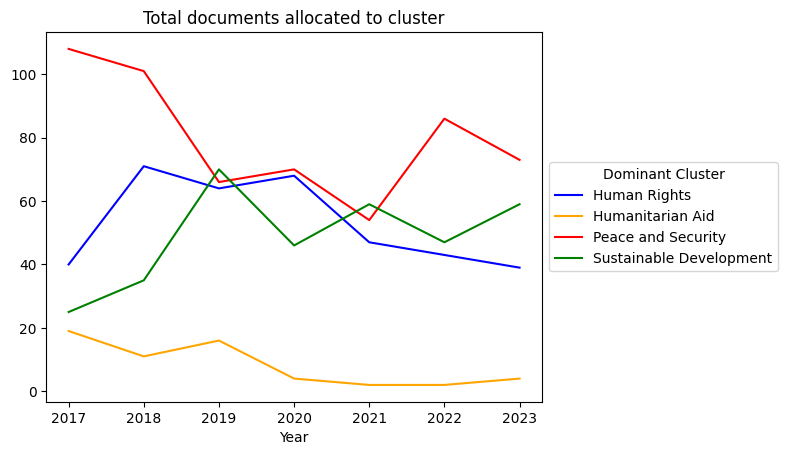

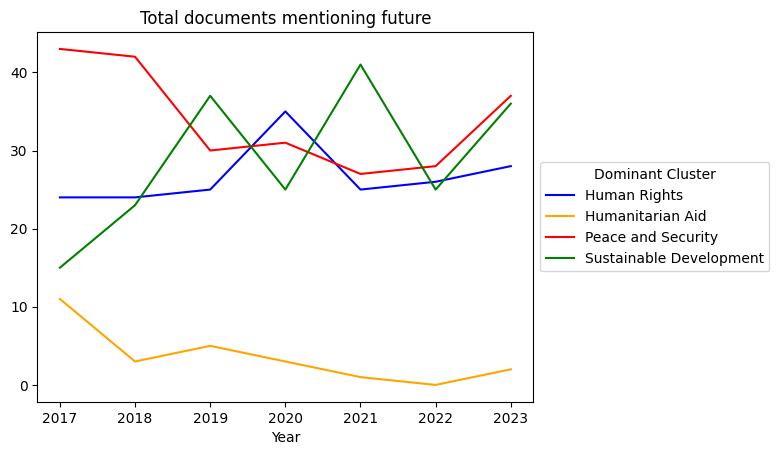

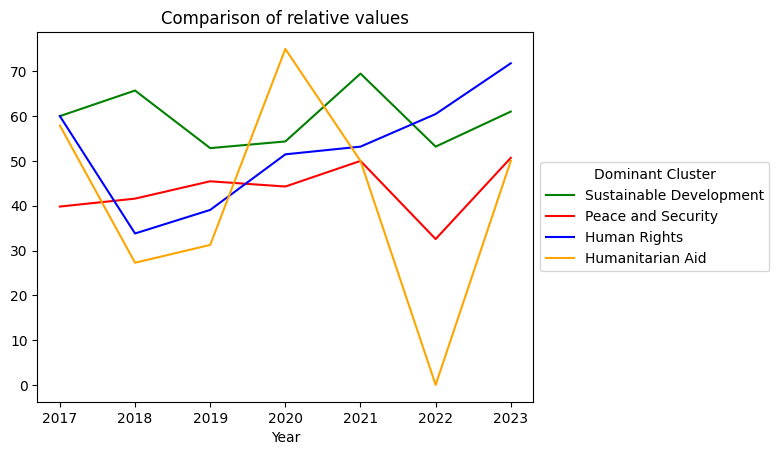

In [ ]:
#@title 3.1 Plot Definition One of Future Orientation
# @markdown Defintion One: Proportion of observations (documents or tokens) that contain the word "future" per unit of analysis.

# @markdown Select the approach for the unit of analysis allocation:
Algorithm = "Document" # @param ["Document", "Token"]
# @markdown Choose the style of visualization:
Style='line'# @param ['line','bar','barh','hist','box','pie']
Export_Excel = True # @param {type:"boolean"}
Exportpath = "/content/drive/MyDrive/definition one.xlsx" # @param {type:"string"}
# @markdown Please enter full path including file name while exporting to Excel.



if Algorithm=="Document":
  df_plot=speechclusters(df)
  df_plot['Future_Count'] = df_plot['Text'].str.count('future')
  df_plot['Future_Count'] .replace(0, np.nan, inplace=True)
  df_plot=df_plot.groupby(['Year','Dominant Pillar']).count().filter(['Year','Dominant Pillar','Text','Future_Count'])
  df_plot=df_plot.rename(columns={"Text": "Total speeches allocated to cluster", "Future_Count": "Total speeches mentioning future"})
  df_excel=df_plot
  df_plot=df_plot.unstack('Dominant Pillar').swaplevel(axis=1)

  for key, value in clusters.items():
    df_plot[key,'relative']=df_plot[key,'Total speeches mentioning future']/df_plot[key,'Total speeches allocated to cluster']*100
  df_plota=df_plot.swaplevel(axis=1)['Total speeches allocated to cluster'].plot(kind=Style, title='Total documents allocated to cluster',color=my_colors)
  #plotdesign
  plt.legend(title='Dominant Cluster',loc='center left', bbox_to_anchor=(1.0, 0.5))

  df_plotb=df_plot.swaplevel(axis=1)['Total speeches mentioning future'].plot(kind=Style, title='Total documents mentioning future',color=my_colors)
  #plotdesign
  plt.legend(title='Dominant Cluster',loc='center left', bbox_to_anchor=(1.0, 0.5))

  df_plotc=df_plot.swaplevel(axis=1)['relative'].plot(kind=Style, title='Comparison of relative values',color=my_colors_rev)
  #plotdesign
  plt.legend(title='Dominant Cluster',loc='center left', bbox_to_anchor=(1.0, 0.5))

if Algorithm=="Token":
  df_plot=sentenceclusters(df)
  df_plot['Future_Count'] = df_plot['Sentences'].str.count('future')
  df_plot['Future_Count'] .replace(0, np.nan, inplace=True)
  df_plot=df_plot.groupby(['Year','Dominant Pillar']).count().filter(['Year','Dominant Pillar','Text','Future_Count'])
  df_plot=df_plot.rename(columns={"Text": "Total sentences allocated to cluster", "Future_Count": "Total sentences mentioning future"})
  df_excel=df_plot
  df_plot=df_plot.unstack('Dominant Pillar').swaplevel(axis=1)

  for key, value in clusters.items():
    df_plot[key,'relative']=df_plot[key,'Total sentences mentioning future']/df_plot[key,'Total sentences allocated to cluster']*100

  df_plota=df_plot.swaplevel(axis=1)['Total sentences allocated to cluster'].plot(kind=Style, title='Total tokens allocated to cluster',color=my_colors)
  #plotdesign
  plt.legend(title='Dominant Cluster',loc='center left', bbox_to_anchor=(1.0, 0.5))
  df_plotb=df_plot.swaplevel(axis=1)['Total sentences mentioning future'].plot(kind=Style, title='Total tokens mentioning future',color=my_colors)
  #plotdesign
  plt.legend(title='Dominant Cluster',loc='center left', bbox_to_anchor=(1.0, 0.5))
  df_plotc=df_plot.swaplevel(axis=1)['relative'].plot(kind=Style, title='Comparison of relative values',color=my_colors_rev)
  #plotdesign
  plt.legend(title='Dominant Cluster',loc='center left', bbox_to_anchor=(1.0, 0.5))

df_excel=df_plot
if Export_Excel == True:
  export_to_excel(df_excel,Exportpath)


<ipython-input-10-8a8159c9b86b>:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_plot=df_plot.sum()


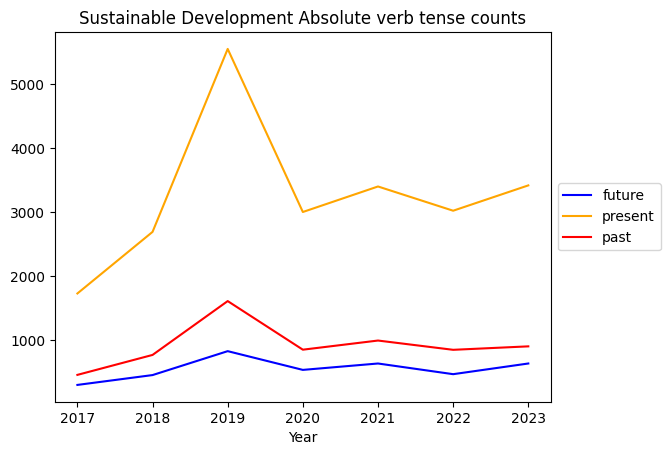

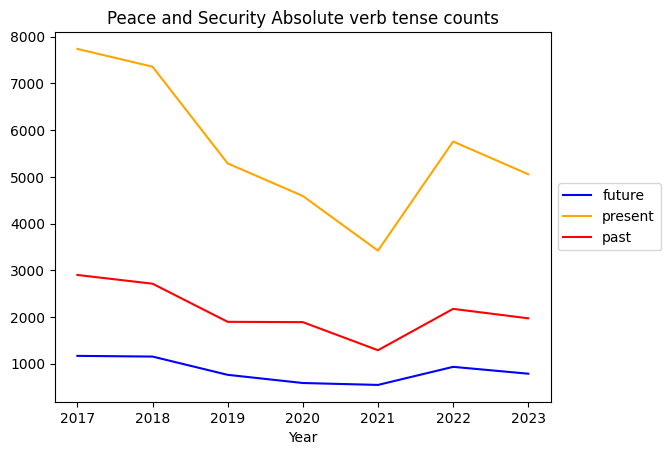

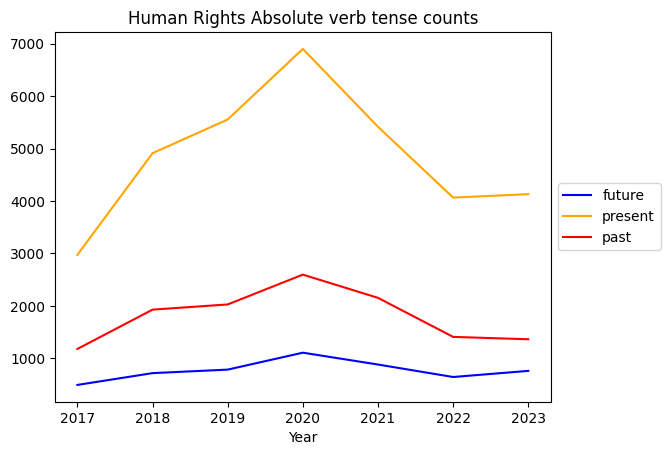

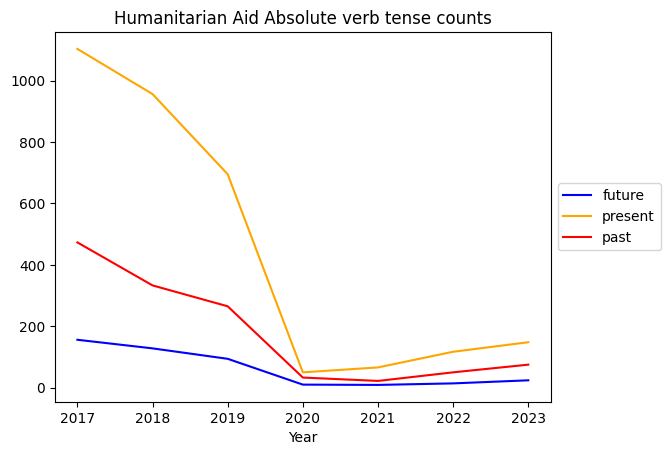

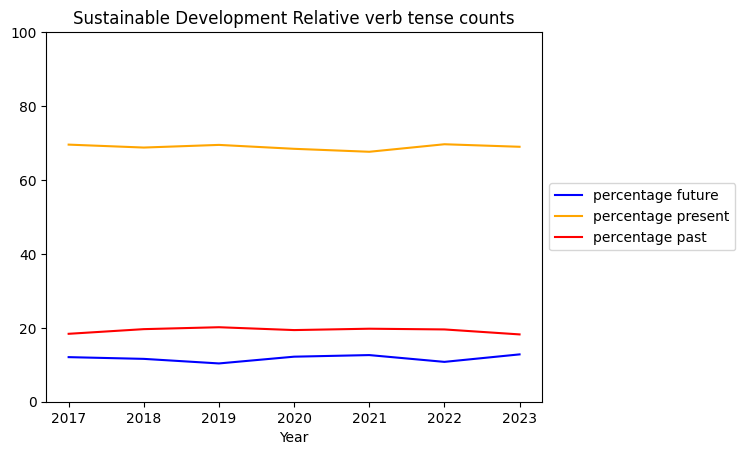

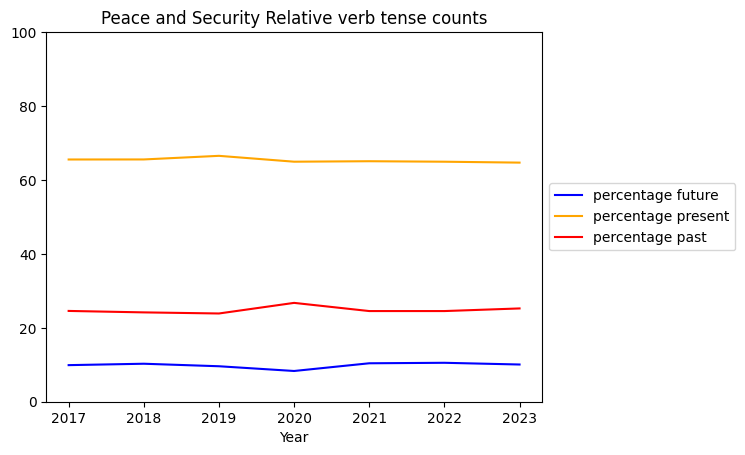

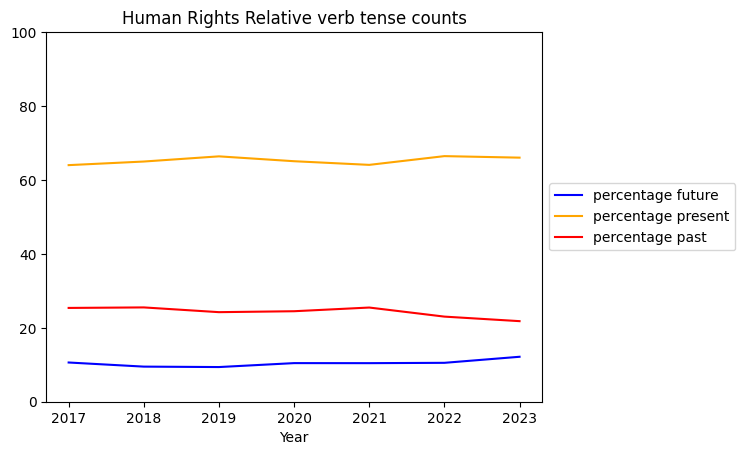

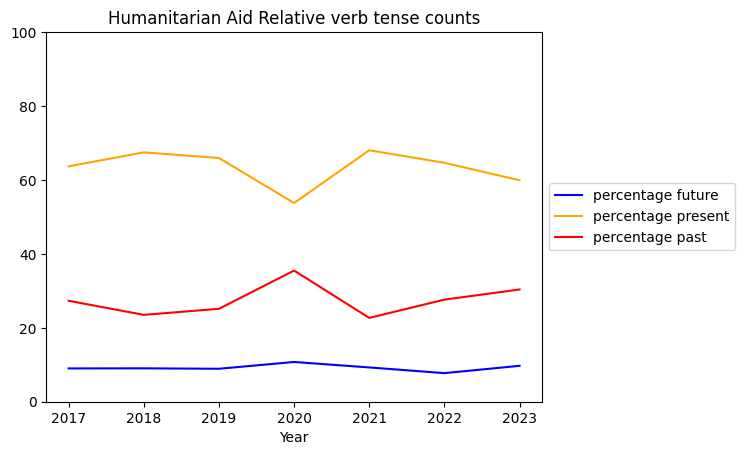

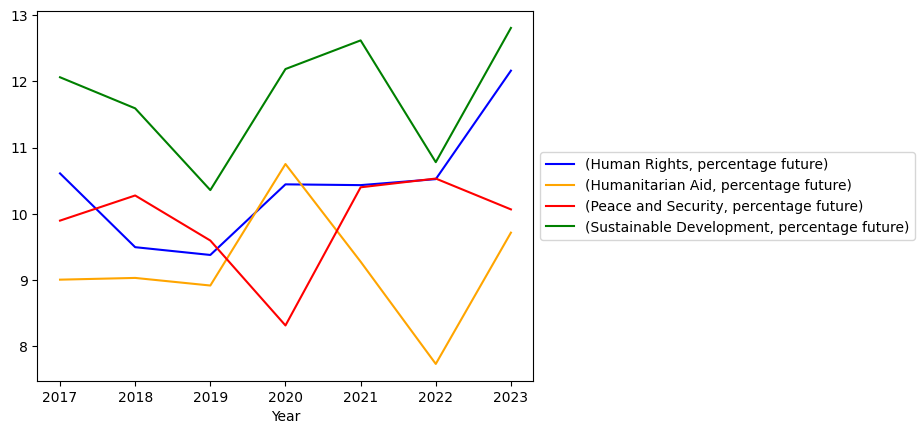

In [ ]:
#@title 3.2 Plot Definition Two of Future Orientation
# @markdown Definition Two: Percentage of future tense usage per unit of analysis

# @markdown Select the approach for the unit of analysis allocation:
Algorithm = "Document verb tense" # @param ["Corpus verb tenses", "Document verb tense", "Token verb tense"]
# @markdown Choose the style of visualization:
Style='line'# @param ['line','bar','barh','hist','box','pie']
Export_Excel = False # @param {type:"boolean"}
Exportpath = "/content/drive/MyDrive/verb tense dataset.xlsx" # @param {type:"string"}
# @markdown Please enter full path including file name while exporting to Excel.



if Algorithm=='Token verb tense':
  df_plot=sentence_verbtense(df)
  df_excel=df_plot
  df_plot=df_plot.groupby(['Year', 'Dominant Pillar'])
  df_plot=df_plot.sum()
  df_plot=df_plot.filter(['Year', 'Dominant Pillar','future','present','past'])

  df_plota=df_plot.unstack('Dominant Pillar').swaplevel(axis=1)
  for key, value in clusters.items():
    df_plota[key].plot(kind=Style, title=key +' Absolute verb tense counts',color=my_colors)
    #plotdesign
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
  df_plotb=df_plot
  df_plotb['year_total']=df_plot.sum(axis=1, numeric_only=True)
  tenses=['future','present','past']
  for tense in tenses:
    df_plotb['percentage '+tense] = df_plotb[tense] / df_plotb.year_total * 100

  df_plotb=df_plotb.filter(['Year', 'Dominant Pillar','percentage future','percentage present','percentage past'])
  df_plotc=df_plotb.filter(['percentage future'])
  df_plotb=df_plotb.unstack('Dominant Pillar').swaplevel(axis=1)

  for key, value in clusters.items():
    df_plotb[key].plot(kind=Style, title=key +' Relative verb tense counts',color=my_colors)
    #plotdesign
    plt.ylim((0,100))
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

  df_plotc=df_plotc.unstack('Dominant Pillar').swaplevel(axis=1)
  df_plotc.plot(color=my_colors)
  #plotdesign
  plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

if Algorithm=='Document verb tense':
  df_plot=speech_verbtense(df)
  df_excel=df_plot
  df_plot=df_plot.groupby(['Year', 'Dominant Pillar'])
  df_plot=df_plot.sum()
  df_plot=df_plot.filter(['Year', 'Dominant Pillar','future','present','past'])

  df_plota=df_plot.unstack('Dominant Pillar').swaplevel(axis=1)

  for key, value in clusters.items():
    df_plota[key].plot(kind=Style, title=key +' Absolute verb tense counts',color=my_colors)
    #plotdesign
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

  df_plotb=df_plot
  df_plotb['year_total']=df_plot.sum(axis=1, numeric_only=True)

  tenses=['future','present','past']
  for tense in tenses:
    df_plotb['percentage '+tense] = df_plotb[tense] / df_plotb.year_total * 100

  df_plotb=df_plotb.filter(['Year', 'Dominant Pillar','percentage future','percentage present','percentage past'])
  df_plotc=df_plotb.filter(['percentage future'])
  df_plotb=df_plotb.unstack('Dominant Pillar').swaplevel(axis=1)
  for key, value in clusters.items():
    df_plotb[key].plot(kind=Style, title=key +' Relative verb tense counts',color=my_colors)
    #plotdesign
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.ylim((0,100))
  df_plotc=df_plotc.unstack('Dominant Pillar').swaplevel(axis=1)
  df_plotc.plot(color=my_colors)
  #plotdesign
  plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

if Algorithm=='Corpus verb tenses':

  df_verbs=pd.DataFrame()
  df_verbs=df['Text'].apply(determine_tense_input).apply(pd.Series)
  df_verbs.columns = ['future', 'present', 'past']
  df_plot=pd.concat([df, df_verbs], axis=1)
  df_excel=df_plot
  df_plot=df_plot.groupby(['Year'])
  df_plot=df_plot.sum()

  df_plota=df_plot.filter(['Year','future','present','past'])
  df_plota.plot(kind=Style, title='Absolute verb tense counts',color=my_colors)
  #plotdesign
  plt.legend(title='Verb tense',loc='center left', bbox_to_anchor=(1.0, 0.5))

  df_plotb=df_plot
  df_plotb['year_total']=df_plot.sum(axis=1, numeric_only=True)
  tenses=['future','present','past']
  for tense in tenses:
    df_plotb['percentage '+tense] = df_plotb[tense] / df_plotb.year_total * 100

  df_plotb=df_plotb.filter(['Year','percentage future','percentage present','percentage past'])
  df_plotb.plot(kind=Style, title='Relative verb tense counts',color=my_colors)
  #plotdesign
  plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

if Export_Excel == True:
  export_to_excel(df_excel,Exportpath)



In [ ]:
#@title 3.3 Definition Three of Future Orientation

# @markdown Definition Three: Mean frequency of future expressions per observation (document and tokens) and unit of analysis

# @markdown Enter a list of future expressions:

fexpressions_label="Future expressions"#@param {type:"string"}
fexpressions_keywords= [ "future", "succeeding", "foreseeable", "next", "forthcoming", "later", "ahead", "prospect", "prospects", "outlook", "horizon", "upcoming", "anticipated", "expected", "forthcoming", "someday", "tomorrow", "impending", "short-term", "long-term", "short term", "long term", "following", "to come", "advance", "new", "change", "time", "years", "agenda", "commitment", "build", "hope", "challenges", "opportunity", "goals", "ensure", "forward", "going to", "will", "incoming", "futurity", "posterity", "hereafter", "coming", "impending", "prospective", "eventual", "following", "subsequent", "to be", "expected", "approaching"]#@param {type:"raw"}

fexpressions = {
    fexpressions_label: fexpressions_keywords
    }
# @markdown If you wish to follow the FOA identification methodology for keywords utilizing BART, please refer to section 5.

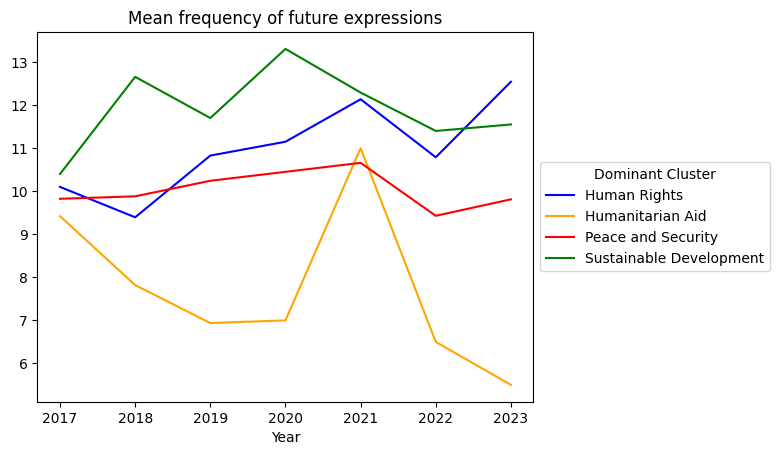

In [ ]:
#@title Visualize Definition Three
# @markdown Select the approach for the unit of analysis allocation:
Algorithm = "Document cluster" # @param ["Document cluster", "Token cluster"]
# @markdown Choose the style of visualization:
Style='line'# @param ['line','bar','barh','hist','box','pie']
Export_Excel = False # @param {type:"boolean"}
Exportpath = "/content/drive/MyDrive/Future Expressions.xlsx" # @param {type:"string"}
# @markdown Please enter full path including file name while exporting to Excel.


if Algorithm =='Document cluster':
  df_pillar=speechclusters(df)
  df_fexp=pd.DataFrame()
  df_fexp['future expression counter']=df_pillar['Text'].apply(orientation_expressioncount)
  cleared_df=pd.concat([df_pillar,df_fexp],axis=1)

  df_plot=cleared_df.groupby(['Year','Dominant Pillar'])['future expression counter'].mean()
  df_plot=df_plot.unstack('Dominant Pillar').plot(kind=Style, title='Mean frequency of future expressions',color=my_colors)
  #plotdesign
  plt.legend(title='Dominant Cluster',loc='center left', bbox_to_anchor=(1.0, 0.5))

  df_excel=cleared_df.groupby(['Year','Dominant Pillar'])['future expression counter'].mean()

if Algorithm =='Token cluster':
  df_sent=sentenceclusters(df)
  df_fexp=pd.DataFrame()
  df_fexp['future expression counter']=df_sent['Sentences'].apply(orientation_expressioncount)
  cleared_df=pd.concat([df_sent,df_fexp],axis=1)

  df_plot=cleared_df.groupby(['Year','Dominant Pillar'])['future expression counter'].mean()
  df_plot=df_plot.unstack('Dominant Pillar').plot(kind=Style, title='Mean frequency',color=my_colors)
  #plotdesign
  plt.legend(title='Dominant Cluster',loc='center left', bbox_to_anchor=(1.0, 0.5))

  df_excel=cleared_df.groupby(['Year','Dominant Pillar'])['future expression counter'].mean()

if Export_Excel == True:
  df_excel.to_excel(Exportpath)

## 4. Additional Analysis: Explore the degree of Future Orientation

In [ ]:
#@title 4.1 Define the degree of future orientation through short-term and long-term keywords

# @markdown The FOA tool allocates documents/tokens to a dominant degree of future orientation.

# @markdown Enter a list of words characterising each degree of future orientation:


orientation_1_label="Short Term"#@param {type:"string"}
orientation_1_keywords= ["3 years", "5 years", "10 years", "short-term", "next months","following months", "next weeks", "following weeks", "next decade", "upcoming","in the near future", "soon", "in a few days", "in a few weeks", "by the end of this year","by the end of next year", "in the coming days", "in the coming weeks", "later this year","later next year", "shortly", "in the short run", "in the foreseeable future", "by next month","by next quarter", "within days", "within weeks", "soon-to-be", "approaching", "impending", "on the horizon", "in the pipeline", "on the agenda", "in preparation", "underway", "forthcoming"] #@param {type:"raw"}
orientation_2_label="Long Term"#@param {type:"string"}
orientation_2_keywords = ["20 years", "30 years", "40 years", "50 years", "60 years", "100 years", "long-term",     "future generations", "our children", "our grandchildren", "century", "in the distant future",     "for posterity", "down the line", "in the long run", "decades to come", "future decades",     "the next century", "in perpetuity", "for the future", "sustainable future", "legacy",     "vision for the future", "long-range planning", "strategic future", "future outlook",     "generations ahead", "the long haul", "distant horizon", "future prospects"] #@param {type:"raw"}




orientations = {
    orientation_1_label: orientation_1_keywords,
    orientation_2_label: orientation_2_keywords,
    }

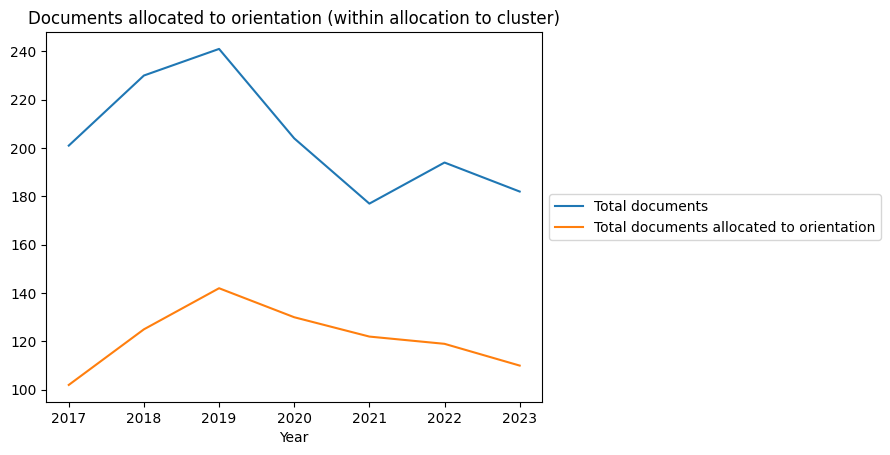

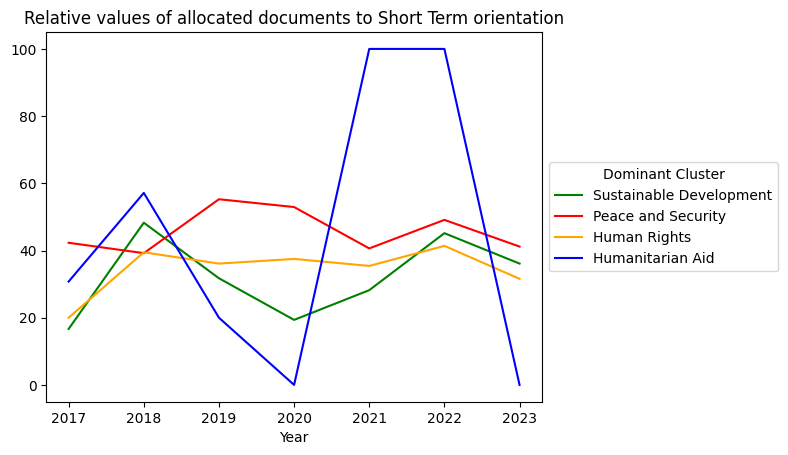

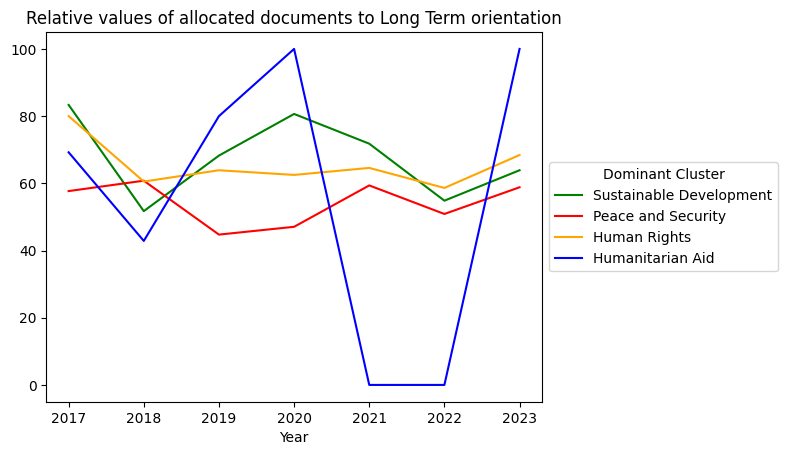

In [ ]:
#@title Plot the degree of future orientation

# @markdown Select the approach for the unit of analysis allocation:
Algorithm = "Document future degree" # @param ["Document future degree", "Token future degree"]
# @markdown Choose the style of visualization:
Style='line'# @param ['line','bar','barh','hist','box','pie']
Export_Excel = False # @param {type:"boolean"}
Exportpath = "/content/drive/MyDrive/Speech Future Orientation.xlsx" # @param {type:"string"}
# @markdown Please enter full path including file name while exporting to Excel.


if Algorithm == 'Document future degree':
  df_plot=speechclustersfo(df)
  df_plotx=df_plot.groupby(['Year']).count()
  df_plotx=df_plotx.filter(['Year', 'Text','Dominant Orientation'])
  df_plotx=df_plotx.rename(columns={"Text": "Total documents", "Dominant Orientation": "Total documents allocated to orientation"}).plot(title='Documents allocated to orientation (within allocation to cluster)')
  #plotdesign
  plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

  df_plot=df_plot.groupby(['Year', 'Dominant Pillar','Dominant Orientation'])

  #df_plota=plotclustersfo(df_plot)[0]
  #for key, value in clusters.items():
  #  df_plota[key].plot(kind=Style, title= key +' absolute values')

  df_plotb=plotclustersfo(df_plot)[1]
  df_plot_rel=pd.DataFrame()
  for dfb in df_plotb:
    df_plot_rel=pd.concat([df_plot_rel,dfb],axis=1).fillna(0)
  for key, value in orientations.items():
    df_plot_rel.swaplevel(axis=1)[key].plot(kind=Style,title='Relative values of allocated documents to '+key+ ' orientation',color=my_colors_rev)
    #plotdesign (legend)
    plt.legend(title='Dominant Cluster',loc='center left', bbox_to_anchor=(1.0, 0.5))

if Algorithm =='Token future degree':
  df_plot=sentenceclustersfo(df)
  df_plotx=df_plot.groupby(['Year']).count()
  df_plotx=df_plotx.filter(['Year', 'Text','Dominant Orientation'])
  df_plotx=df_plotx.rename(columns={"Text": "Total sentences", "Dominant Orientation": "Total sentences allocated to orientation"}).plot(title='Sentences allocated to orientation (within allocation to cluster)',color=my_colors_rev)
  #plotdesign
  plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

  df_plot=df_plot.groupby(['Year', 'Dominant Pillar','Dominant Orientation'])

  #df_plota=plotclustersfo(df_plot)[0]
  #for key, value in clusters.items():
  #  df_plota[key].plot(kind=Style, title= key +' absolute values')

  df_plotb=plotclustersfo(df_plot)[1]
  df_plot_rel=pd.DataFrame()
  for dfb in df_plotb:
     df_plot_rel=pd.concat([df_plot_rel,dfb],axis=1).fillna(0)
  for key, value in orientations.items():
    df_plot_rel.swaplevel(axis=1)[key].plot(kind=Style,title='Relative values of allocated documents to '+key+ ' orientation',color=my_colors_rev)
    #plotdesign
    plt.legend(title='Dominant Cluster',loc='center left', bbox_to_anchor=(1.0, 0.5))

if Export_Excel == True:
  export_to_excel(df_plota,Exportpath)

## 5. BART (2019): Deep learning approach to complement the Future Orientation Analysis

Documentation:

- Model: BART

  BART is a transformer encoder-decoder (seq2seq) model with a bidirectional (BERT-like) encoder and an autoregressive (GPT-like) decoder. BART is pre-trained by (1) corrupting text with an arbitrary noising function, and (2) learning a model to reconstruct the original text.

- Underlaying training Dataset: MultiNLI

  The Multi-Genre Natural Language Inference (MultiNLI) corpus is a crowd-sourced collection of 433k sentence pairs annotated with textual entailment information.

Sources:
- https://huggingface.co/facebook/bart-large-mnli
- https://huggingface.co/facebook/bart-large
- https://huggingface.co/datasets/multi_nli

In [ ]:
#@title ### 5.1 Loading the BART model
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

### 5.2 BART approach to explore future orientation and its degree

In [ ]:
#@title Run the model on documents
#@markdown Initialize *bart_large_mnli* on the first selected rows of a given corpus returning dataframes with probability scores in extra columns.

# @markdown Enter the path to your Excel Data file here:
My_Excel="/content/drive/MyDrive/Data UN/Raw Data/RAW_Database SG speeches and remarks (2016-2023).xlsx" #@param {type:"string"}
# @markdown It must contain one column with the date of publication ("date") and one with the content of the documents ("text").
df = pd.read_excel (My_Excel)
df['Date']=pd.to_datetime(df['Date'], errors='coerce')
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Text'] = df['Text'].str.lower()
df_target=df

candidate_labels = ["future oriented"] # @param {type:"raw"}

# @markdown How many rows of your dataframe should be processed?

# @markdown Important: with standard Colab computer ressources it takes about 30 to 40 seconds running time per row.
lastrow=2 # @param {type:"integer"}

for label in candidate_labels:
  df_target[label]=np.nan
for i in range(0,lastrow):
  sequence_to_classify=df_target['Text'].iloc[i]
  classifier_resultlist=classifier(sequence_to_classify,candidate_labels)['scores']
  label_num=0
  for label in candidate_labels:
    df_target[label].iloc[i]=classifier_resultlist[label_num]
    label_num+=1

# @markdown Better performance can be achived by running the code locally and then reuploading the data file.

Export_Excel = False # @param {type:"boolean"}
Exportpath = "/content/drive/MyDrive/Database SG speeches and remarks (2016-2023)-deeplearning XX.xlsx" # @param {type:"string"}
# @markdown Please enter full path including file name while exporting to Excel.

if Export_Excel == True:
  export_to_excel(df_target,Exportpath)

df_target

<ipython-input-7-09ad765a2335>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']=pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-7-09ad765a2335>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target[label].iloc[i]=classifier_resultlist[label_num]


,Topic \n(Pillars: HR; Peace&Security; Development; Rule of Law \nor self-assessed),Location,Date,Title,Format \n(SG_speech; SG_remark),Text,Link,Year,Month,future oriented
0,General,UN,2017-01-03,António Guterres’ address to staff,SG_speech,"dear colleagues, this is indeed a very emotion...",https://www.un.org/sg/en/content/sg/speeches/2...,2017,1,0.888696
1,Peace and security,UN,2017-01-10,Remarks to the Security Council Open Debate on...,SG_remark,"madame president, may i first of all thank you...",https://www.un.org/sg/en/content/sg/speeches/2...,2017,1,0.992716
2,General,Sweden,2017-01-10,Opening remarks at press stakeout with Foreign...,SG_remark,"ladies and gentleman, thank you very much for ...",https://www.un.org/sg/en/content/sg/speeches/2...,2017,1,NaN
3,General,Cyprus,2017-01-12,Opening remarks at press encounter at the Conf...,SG_remark,"ladies and gentlemen of the media, thank you v...",https://www.un.org/sg/en/content/sg/speeches/2...,2017,1,NaN
4,General,UN,2017-01-13,Remarks at Handover Ceremony of Chairmanship o...,SG_speech,[as delivered]señor presidente de la republica...,https://www.un.org/sg/en/content/sg/speeches/2...,2017,1,NaN
...,...,...,...,...,...,...,...,...,...,...
1202,Development,NaN,2023-01-21,Secretary-General's opening remarks at press e...,SG_remark,ladies and gentlemen of the press – good after...,NaN,2023,1,NaN
1203,Development,NaN,2023-01-18,Secretary-General's remarks at the World Econo...,SG_remark,"excellencies, dear friends,thank you very much...",NaN,2023,1,NaN
1204,Rule of Law,NaN,2023-01-12,Secretary-General's remarks to the Security Co...,SG_remark,i congratulate japan on its presidency at the ...,NaN,2023,1,NaN
1205,Climate,NaN,2023-01-09,Secretary-General's remarks at the Internation...,SG_remark,"your excellency, prime minister sharif,excelle...",NaN,2023,1,NaN


In [ ]:
#@title Plotting the BART results

# @markdown This code allows you to plot the mean of a certain columns containing probability scores generated by the BART model which includes the allocation of documents to units of analyses, using the preliminary allocation functions.

# @markdown Enter the path to your Excel Data file here:
My_Excel="/content/drive/MyDrive/Database SG speeches and remarks (2016-2023)-deeplearning XX.xlsx" #@param {type:"string"}
df = pd.read_excel (My_Excel)
Column_to_plot="future oriented " #@param {type:"string"}
my_colors = ['b', 'orange', 'r', 'g', 'y' ]

df_plot=speechclusters(df).groupby(['Year', 'Dominant Pillar'])
df_plot[Column_to_plot].mean().unstack().plot(title='Mean value of column ' + str(Column_to_plot),color=my_colors)


In [ ]:
#@title ### 5.3 Mixed approach to extract keywords using BART results
# @markdown Please use the same Excel Data file that Bart generated before and identify an adequate threshold for filtering observations.

from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
import re
# @markdown Which column of the dataframe above should be analysed?

regarded_column="future oriented" #@param {type:"string"}

# @markdown Minimum threshold the value in the regarded column must pass:
threshold = 0.9 # @param {type:"number"}

feature_df=df[df[regarded_column] > threshold]
# @markdown Which words should be excluded from the feature extraction:
extra_stopwords = {'sustainable','world','people','united','nations','climate','countries','peace','global','thank','international','human','development','security','community'}# @param {type:"raw"}

# Basic preprocessing function to clean the text data
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text

# @markdown How many keywords should be generated:
num_keywords = 50 # @param {type:"integer"}

# Apply basic preprocessing to the 'Text' column
feature_df['Processed_Text'] = feature_df['Text'].apply(preprocess_text)

# Combine all future-oriented speeches into one large text corpus for analysis
corpus = " ".join(feature_df['Processed_Text'])

# Define a custom list of stopwords by converting the set to a list
custom_stopwords = list(ENGLISH_STOP_WORDS.union(extra_stopwords))

# Initialize CountVectorizer with the custom list of stopwords
vectorizer = CountVectorizer(stop_words=custom_stopwords)

# Fit and transform the corpus
X = vectorizer.fit_transform([corpus])

# Sum up the counts of each term
sum_words = X.sum(axis=0)

# Map from term index to term with frequency
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

# Sort the words by frequency in descending order
sorted_words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Select the top N words, excluding the most common ones
top_future_related_keywords = [word for word, freq in sorted_words_freq][:num_keywords]

top_future_related_keywords